In [11]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np

dictionary = json.load(open('/Users/prana/Downloads/3264e47f047a037b-Acc20230216115840.json'))
data = pd.DataFrame(dictionary)
dictionary1 = json.load(open('/Users/prana/Downloads/3264e47f047a037b-PPG20230216115840.json'))
data1 = pd.DataFrame(dictionary1)
df = pd.read_csv ('D:\Pilot Study\Varun Data\Data\Lab_varun_Session1_P2_2144_Calibrated_SD.csv',skiprows=1,sep='\t',header=None)#,usecols=['Time', 'PPG', 'A_X','A_Y','A_Z']

display(df)
display(data)
display(data1)
%matplotlib notebook

0                       1  \
0      P2_2144_Timestamp_Unix_CAL  P2_2144_Accel_LN_X_CAL   
1                              ms                 m/(s^2)   
2            1.676527784848999E12       4.032608695652174   
3           1.6765277848888245E12       4.641304347826087   
4             1.67652778492865E12       4.717391304347826   
...                           ...                     ...   
28839       1.6765289332951965E12       2.641304347826087   
28840        1.676528933335022E12       5.782608695652174   
28841       1.6765289333748474E12       5.163043478260869   
28842       1.6765289334146729E12      2.9891304347826084   
28843       1.6765289334544983E12     -0.9347826086956521   

                            2                       3                    4   5  
0      P2_2144_Accel_LN_Y_CAL  P2_2144_Accel_LN_Z_CAL  P2_2144_PPG_A13_CAL NaN  
1                     m/(s^2)                 m/(s^2)                   mV NaN  
2           8.630434782608695       9.543478260869565   1118.6813186813185 NaN  
3           7.641304347826087      10.369565217391305    1098.168498168498 NaN  
4           8.478260869565217      10.467391304347826   1063.7362637362637 NaN  
...                       ...                     ...                  ...  ..  
28839       6.880434782608695      -5.478260869565217   1695.2380952380952 NaN  
28840       4.978260869565217     -3.6739130434782608   1605.8608058608058 NaN  
28841       8.347826086956522      -6.119565217391304   1576.5567765567764 NaN  
28842                    7.25     -3.4456521739130435   1540.6593406593406 NaN  
28843       9.597826086956522      -2.630434782608696   1596.3369963369962 NaN  

[28844 rows x 6 columns]

Time    A_X   A_Y   A_Z
0      1676527839194    635  -181  3973
1      1676527839234    444   326  4220
2      1676527839276    432   321  4138
3      1676527839315    191   767  4270
4      1676527839356    205   880  4179
...              ...    ...   ...   ...
26695  1676528911202  -3847  -353   242
26696  1676528911243  -4675   -58   232
26697  1676528911282  -5221  -106   852
26698  1676528911323  -4296    29  1529
26699  1676528911365  -2609   465   740

[26700 rows x 4 columns]

Time      PPG
0      1676527839194  1986387
1      1676527839234  1986601
2      1676527839276  1986784
3      1676527839315  1986994
4      1676527839356  1987356
...              ...      ...
26695  1676528911202  2092573
26696  1676528911243  2091192
26697  1676528911282  2090185
26698  1676528911323  2089446
26699  1676528911365  2088281

[26700 rows x 2 columns]

In [12]:
new_column_names = ['Time','A_X','A_Y','A_Z','PPG','A']
df.columns = new_column_names
df = df.drop(index=[0, 1]).reset_index(drop=True)
df = df.drop(columns=["A"])

df

Time                  A_X                A_Y  \
0       1.676527784848999E12    4.032608695652174  8.630434782608695   
1      1.6765277848888245E12    4.641304347826087  7.641304347826087   
2        1.67652778492865E12    4.717391304347826  8.478260869565217   
3      1.6765277849684753E12    4.934782608695652  8.391304347826086   
4      1.6765277850083008E12    5.891304347826087  6.630434782608695   
...                      ...                  ...                ...   
28837  1.6765289332951965E12    2.641304347826087  6.880434782608695   
28838   1.676528933335022E12    5.782608695652174  4.978260869565217   
28839  1.6765289333748474E12    5.163043478260869  8.347826086956522   
28840  1.6765289334146729E12   2.9891304347826084               7.25   
28841  1.6765289334544983E12  -0.9347826086956521  9.597826086956522   

                       A_Z                 PPG  
0        9.543478260869565  1118.6813186813185  
1       10.369565217391305   1098.168498168498  
2       10.467391304347826  1063.7362637362637  
3        10.16304347826087  1088.6446886446886  
4        11.51086956521739   1093.040293040293  
...                    ...                 ...  
28837   -5.478260869565217  1695.2380952380952  
28838  -3.6739130434782608  1605.8608058608058  
28839   -6.119565217391304  1576.5567765567764  
28840  -3.4456521739130435  1540.6593406593406  
28841   -2.630434782608696  1596.3369963369962  

[28842 rows x 5 columns]

In [13]:
import datetime

df['Time'] = pd.to_datetime(df['Time'], unit='ms', utc=False)
df['Time']=df['Time'].dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')
df['Time'] = df['Time'].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S.%f"))
df

Time                  A_X                A_Y  \
0      2023-02-16 11:39:44.848999    4.032608695652174  8.630434782608695   
1      2023-02-16 11:39:44.888824    4.641304347826087  7.641304347826087   
2      2023-02-16 11:39:44.928649    4.717391304347826  8.478260869565217   
3      2023-02-16 11:39:44.968475    4.934782608695652  8.391304347826086   
4      2023-02-16 11:39:45.008300    5.891304347826087  6.630434782608695   
...                           ...                  ...                ...   
28837  2023-02-16 11:58:53.295196    2.641304347826087  6.880434782608695   
28838  2023-02-16 11:58:53.335021    5.782608695652174  4.978260869565217   
28839  2023-02-16 11:58:53.374847    5.163043478260869  8.347826086956522   
28840  2023-02-16 11:58:53.414672   2.9891304347826084               7.25   
28841  2023-02-16 11:58:53.454498  -0.9347826086956521  9.597826086956522   

                       A_Z                 PPG  
0        9.543478260869565  1118.6813186813185  
1       10.369565217391305   1098.168498168498  
2       10.467391304347826  1063.7362637362637  
3        10.16304347826087  1088.6446886446886  
4        11.51086956521739   1093.040293040293  
...                    ...                 ...  
28837   -5.478260869565217  1695.2380952380952  
28838  -3.6739130434782608  1605.8608058608058  
28839   -6.119565217391304  1576.5567765567764  
28840  -3.4456521739130435  1540.6593406593406  
28841   -2.630434782608696  1596.3369963369962  

[28842 rows x 5 columns]

In [14]:
df=df.iloc[1375:28075].reset_index(drop=True)
df

Time                  A_X                  A_Y  \
0      2023-02-16 11:40:39.608978   -5.184782608695652    5.119565217391304   
1      2023-02-16 11:40:39.648803  -5.3478260869565215   5.0978260869565215   
2      2023-02-16 11:40:39.688629   -5.423913043478261    4.760869565217392   
3      2023-02-16 11:40:39.728454   -5.065217391304348    4.239130434782608   
4      2023-02-16 11:40:39.768280  -5.0978260869565215    4.358695652173913   
...                           ...                  ...                  ...   
26695  2023-02-16 11:58:22.749084   0.8695652173913043   -7.608695652173913   
26696  2023-02-16 11:58:22.788909    1.108695652173913  -6.8478260869565215   
26697  2023-02-16 11:58:22.828735   1.0434782608695652   -6.163043478260869   
26698  2023-02-16 11:58:22.868560   1.7065217391304348   -5.967391304347826   
26699  2023-02-16 11:58:22.908386    1.717391304347826   -5.804347826086956   

                        A_Z                 PPG  
0       -1.7934782608695652  1685.7142857142856  
1       -1.8152173913043477  2149.4505494505493  
2       -1.8695652173913042  2071.7948717948716  
3       -2.2065217391304346  1572.8937728937728  
4       -2.8043478260869565  1175.0915750915751  
...                     ...                 ...  
26695   -0.4891304347826087  1405.8608058608058  
26696    -0.967391304347826  1415.3846153846152  
26697  -0.45652173913043476  1362.6373626373625  
26698  -0.11956521739130435  1475.4578754578754  
26699    0.2934782608695652  1666.6666666666665  

[26700 rows x 5 columns]

In [15]:
data['A_X'] = data['A_X'].apply(lambda x:float(x))
data['A_Y'] = data['A_Y'].apply(lambda x:float(x))
data['A_Z'] = data['A_Z'].apply(lambda x:float(x))
data['Time'] = data['Time'].apply(lambda x:float(x))
data1['PPG'] = data1['PPG'].apply(lambda x:float(x))
data1['Time'] = data1['Time'].apply(lambda x:float(x))

In [16]:
# Set the 'Activity' column to 'Ideal' for the first 500 rows
data.loc[:4499, 'Activity'] = 'Ideal'

# Set the 'Activity' column to 'Sitting' for the next 1000 rows
data.loc[4500:11999, 'Activity'] = 'Sitting'

# Set the 'Activity' column to 'Standing' for the next 1000 rows
data.loc[12000:19499, 'Activity'] = 'Standing'

# Set the 'Activity' column to 'Walking' for the next 1000 rows
data.loc[19500:, 'Activity'] = 'Walking'

# Print the first 10 rows of the data frame
display(data)

Time     A_X    A_Y     A_Z Activity
0      1.676528e+12   635.0 -181.0  3973.0    Ideal
1      1.676528e+12   444.0  326.0  4220.0    Ideal
2      1.676528e+12   432.0  321.0  4138.0    Ideal
3      1.676528e+12   191.0  767.0  4270.0    Ideal
4      1.676528e+12   205.0  880.0  4179.0    Ideal
...             ...     ...    ...     ...      ...
26695  1.676529e+12 -3847.0 -353.0   242.0  Walking
26696  1.676529e+12 -4675.0  -58.0   232.0  Walking
26697  1.676529e+12 -5221.0 -106.0   852.0  Walking
26698  1.676529e+12 -4296.0   29.0  1529.0  Walking
26699  1.676529e+12 -2609.0  465.0   740.0  Walking

[26700 rows x 5 columns]

In [17]:
# Set the 'Activity' column to 'Ideal' for the first 500 rows
data1.loc[:4499, 'Activity'] = 'Ideal'

# Set the 'Activity' column to 'Sitting' for the next 1000 rows
data1.loc[4500:11999, 'Activity'] = 'Sitting'

# Set the 'Activity' column to 'Standing' for the next 1000 rows
data1.loc[12000:19499, 'Activity'] = 'Standing'

# Set the 'Activity' column to 'Walking' for the next 1000 rows
data1.loc[19500:, 'Activity'] = 'Walking'

# Print the first 10 rows of the data frame
display(data1)

Time        PPG Activity
0      1.676528e+12  1986387.0    Ideal
1      1.676528e+12  1986601.0    Ideal
2      1.676528e+12  1986784.0    Ideal
3      1.676528e+12  1986994.0    Ideal
4      1.676528e+12  1987356.0    Ideal
...             ...        ...      ...
26695  1.676529e+12  2092573.0  Walking
26696  1.676529e+12  2091192.0  Walking
26697  1.676529e+12  2090185.0  Walking
26698  1.676529e+12  2089446.0  Walking
26699  1.676529e+12  2088281.0  Walking

[26700 rows x 3 columns]

In [18]:
# Set the 'Activity' column to 'Ideal' for the first 500 rows
df.loc[:4499, 'Activity'] = 'Ideal'

# Set the 'Activity' column to 'Sitting' for the next 1000 rows
df.loc[4500:11999, 'Activity'] = 'Sitting'

# Set the 'Activity' column to 'Standing' for the next 1000 rows
df.loc[12000:19499, 'Activity'] = 'Standing'

# Set the 'Activity' column to 'Walking' for the next 1000 rows
df.loc[19500:, 'Activity'] = 'Walking'

# Print the first 10 rows of the data frame
display(df)

Time                  A_X                  A_Y  \
0      2023-02-16 11:40:39.608978   -5.184782608695652    5.119565217391304   
1      2023-02-16 11:40:39.648803  -5.3478260869565215   5.0978260869565215   
2      2023-02-16 11:40:39.688629   -5.423913043478261    4.760869565217392   
3      2023-02-16 11:40:39.728454   -5.065217391304348    4.239130434782608   
4      2023-02-16 11:40:39.768280  -5.0978260869565215    4.358695652173913   
...                           ...                  ...                  ...   
26695  2023-02-16 11:58:22.749084   0.8695652173913043   -7.608695652173913   
26696  2023-02-16 11:58:22.788909    1.108695652173913  -6.8478260869565215   
26697  2023-02-16 11:58:22.828735   1.0434782608695652   -6.163043478260869   
26698  2023-02-16 11:58:22.868560   1.7065217391304348   -5.967391304347826   
26699  2023-02-16 11:58:22.908386    1.717391304347826   -5.804347826086956   

                        A_Z                 PPG Activity  
0       -1.7934782608695652  1685.7142857142856    Ideal  
1       -1.8152173913043477  2149.4505494505493    Ideal  
2       -1.8695652173913042  2071.7948717948716    Ideal  
3       -2.2065217391304346  1572.8937728937728    Ideal  
4       -2.8043478260869565  1175.0915750915751    Ideal  
...                     ...                 ...      ...  
26695   -0.4891304347826087  1405.8608058608058  Walking  
26696    -0.967391304347826  1415.3846153846152  Walking  
26697  -0.45652173913043476  1362.6373626373625  Walking  
26698  -0.11956521739130435  1475.4578754578754  Walking  
26699    0.2934782608695652  1666.6666666666665  Walking  

[26700 rows x 6 columns]

In [19]:
dfm = pd.merge(data, data1, on=['Time', 'Activity'])[['Time', 'A_X', 'A_Y', 'A_Z','PPG','Activity']]
dfm

Time     A_X    A_Y     A_Z        PPG Activity
0      1.676528e+12   635.0 -181.0  3973.0  1986387.0    Ideal
1      1.676528e+12   444.0  326.0  4220.0  1986601.0    Ideal
2      1.676528e+12   432.0  321.0  4138.0  1986784.0    Ideal
3      1.676528e+12   191.0  767.0  4270.0  1986994.0    Ideal
4      1.676528e+12   205.0  880.0  4179.0  1987356.0    Ideal
...             ...     ...    ...     ...        ...      ...
26695  1.676529e+12 -3847.0 -353.0   242.0  2092573.0  Walking
26696  1.676529e+12 -4675.0  -58.0   232.0  2091192.0  Walking
26697  1.676529e+12 -5221.0 -106.0   852.0  2090185.0  Walking
26698  1.676529e+12 -4296.0   29.0  1529.0  2089446.0  Walking
26699  1.676529e+12 -2609.0  465.0   740.0  2088281.0  Walking

[26700 rows x 6 columns]

In [20]:
import datetime

dfm['Time'] = pd.to_datetime(dfm['Time'], unit='ms', utc=False)
dfm['Time']=dfm['Time'].dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')
dfm['Time'] = dfm['Time'].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S.%f"))
dfm

Time     A_X    A_Y     A_Z        PPG Activity
0      2023-02-16 11:40:39.193999   635.0 -181.0  3973.0  1986387.0    Ideal
1      2023-02-16 11:40:39.233999   444.0  326.0  4220.0  1986601.0    Ideal
2      2023-02-16 11:40:39.276000   432.0  321.0  4138.0  1986784.0    Ideal
3      2023-02-16 11:40:39.315000   191.0  767.0  4270.0  1986994.0    Ideal
4      2023-02-16 11:40:39.356000   205.0  880.0  4179.0  1987356.0    Ideal
...                           ...     ...    ...     ...        ...      ...
26695  2023-02-16 11:58:31.201999 -3847.0 -353.0   242.0  2092573.0  Walking
26696  2023-02-16 11:58:31.243000 -4675.0  -58.0   232.0  2091192.0  Walking
26697  2023-02-16 11:58:31.281999 -5221.0 -106.0   852.0  2090185.0  Walking
26698  2023-02-16 11:58:31.323000 -4296.0   29.0  1529.0  2089446.0  Walking
26699  2023-02-16 11:58:31.364999 -2609.0  465.0   740.0  2088281.0  Walking

[26700 rows x 6 columns]

In [21]:
dfm['A_X'] = dfm['A_X'].apply(lambda x:float(x))
dfm['A_Y'] = dfm['A_Y'].apply(lambda x:float(x))
dfm['A_Z'] = dfm['A_Z'].apply(lambda x:float(x))
dfm['PPG'] = dfm['PPG'].apply(lambda x:float(x))

In [25]:
df['A_X'] = df['A_X'].apply(lambda x:float(x))
df['A_Y'] = df['A_Y'].apply(lambda x:float(x))
df['A_Z'] = df['A_Z'].apply(lambda x:float(x))
df['PPG'] = df['PPG'].apply(lambda x:float(x))

In [26]:
import heartpy as hp
signal = df['PPG'].values
#signal2=df2['Shimmer_ppg'].values[500:]
timer = df['Time'].values
# plt.plot(signal)

#plt.plot(signal2)

sample_rate = hp.get_samplerate_datetime(timer, timeformat = '%Y-%m-%d %H:%M:%S.%f')

print('sampling rate is: %.3f Hz' %sample_rate)

sampling rate is: 25.111 Hz


<IPython.core.display.Javascript object>


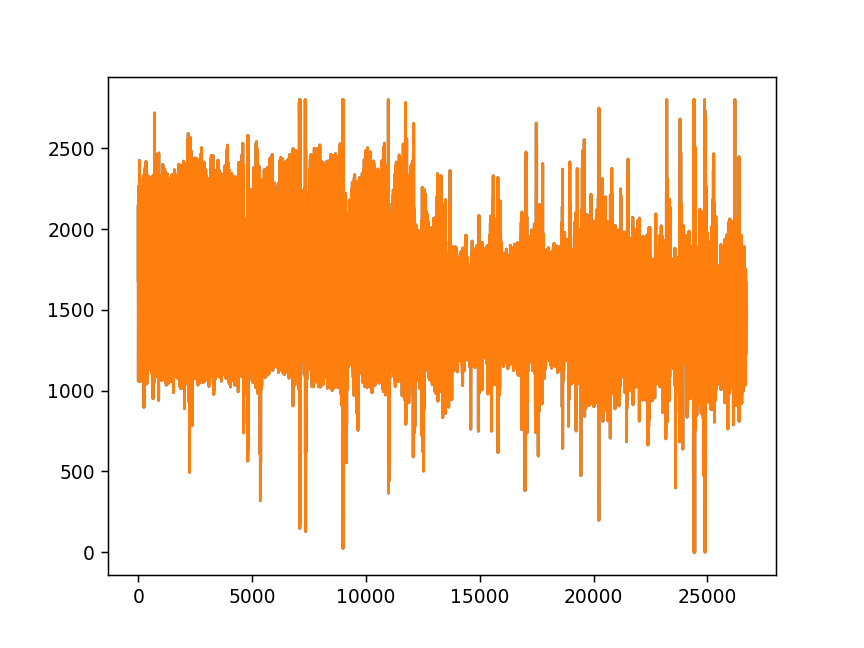

In [27]:
signal = df['PPG'].values
#signal2=df2['Shimmer_ppg'].values[500:]
timer = df['Time'].values
plt.plot(signal)

#plt.plot(signal2)

In [28]:
signal1 = dfm['PPG'].values[100:]
#signal2=df2['Shimmer_ppg'].values[500:]
timer1 = dfm['Time'].values[100:]
plt.plot(signal)

#plt.plot(signal2)

In [29]:
sample_rate1 = hp.get_samplerate_datetime(timer1, timeformat = '%Y-%m-%d %H:%M:%S.%f')

print('sampling rate is: %.3f Hz' %sample_rate1)

sampling rate is: 24.903 Hz


<IPython.core.display.Javascript object>


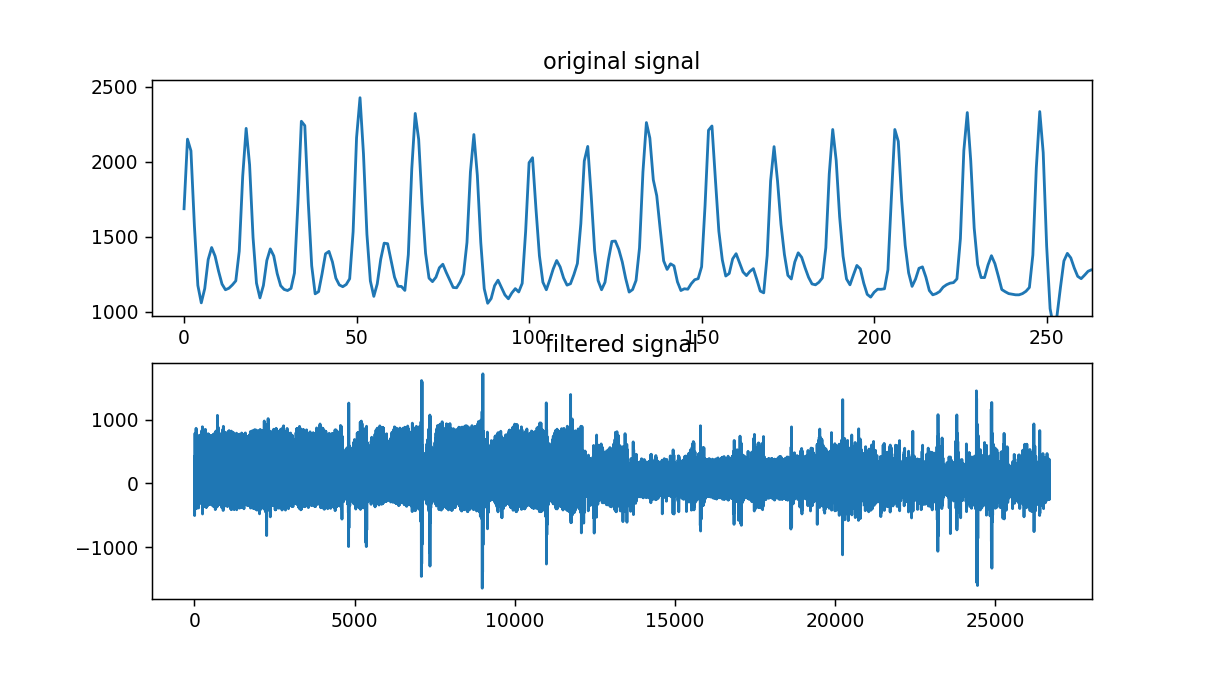

<IPython.core.display.Javascript object>


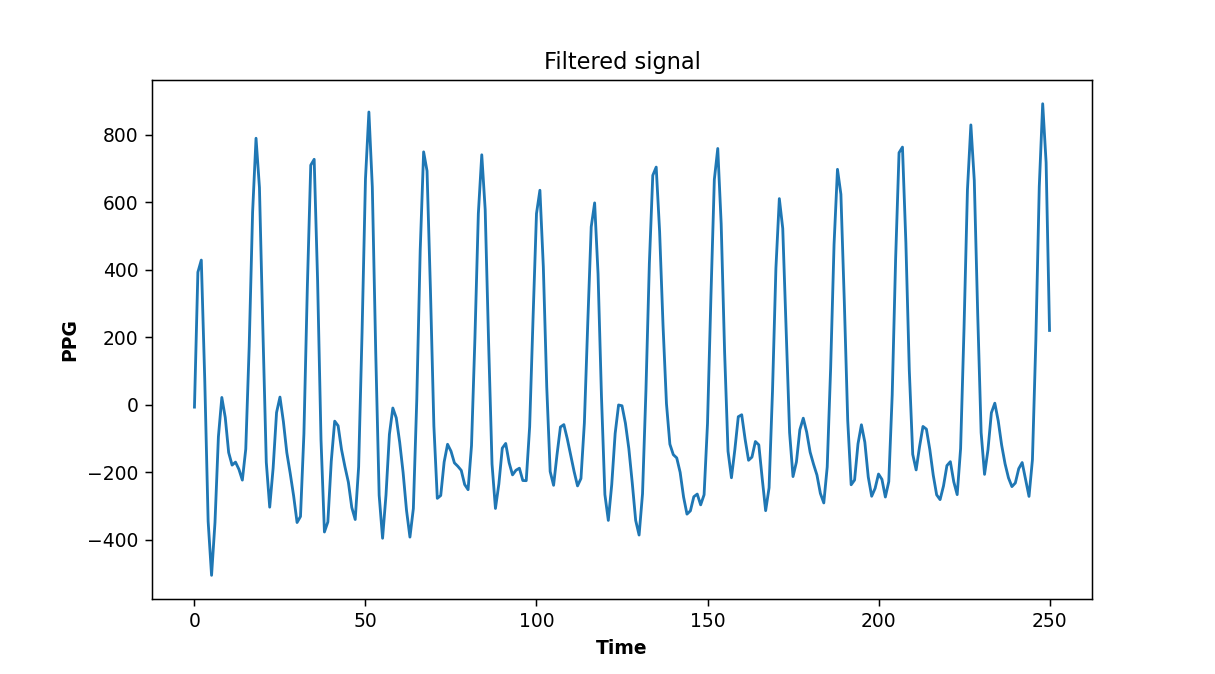

<IPython.core.display.Javascript object>


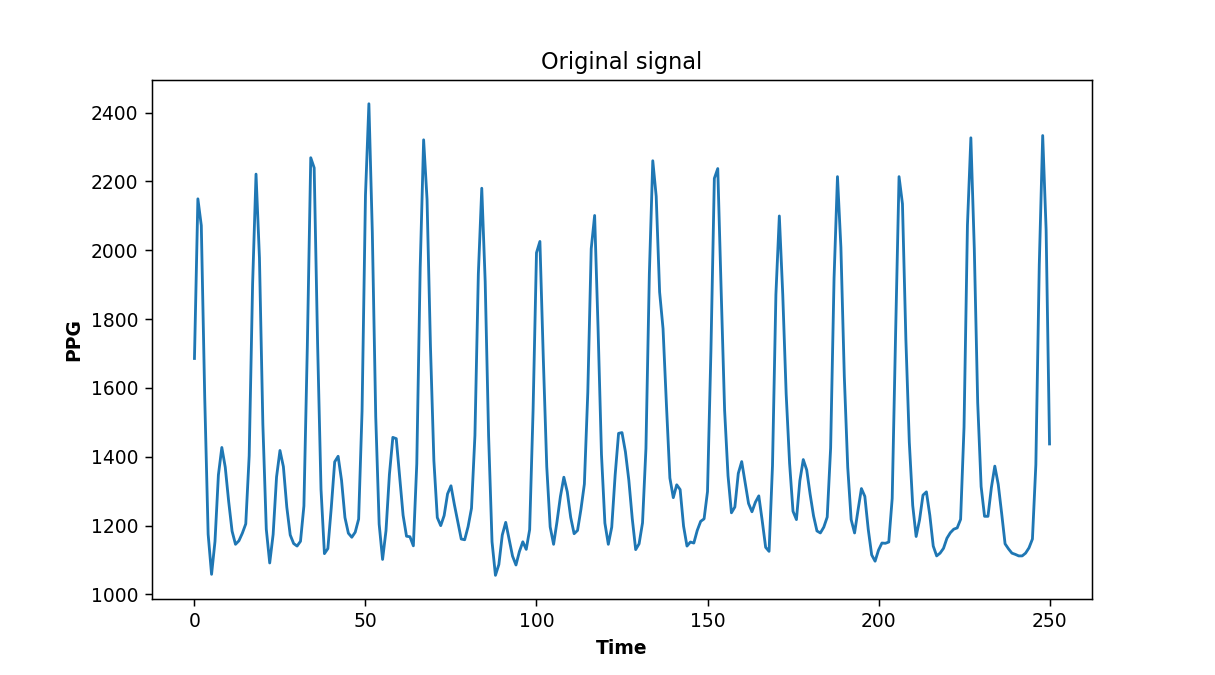

Text(0.5, 0, 'Time')

In [30]:
filtered = hp.filter_signal(signal, [0.7, 5], sample_rate=sample_rate, 
                            order=6, filtertype='bandpass')

#let's plot first 240 seconds and work with that!
plt.figure(figsize=(9,5))
plt.subplot(211)
plt.plot(signal)
plt.title('original signal')
plt.subplot(212)
plt.plot(filtered)
plt.title('filtered signal')
plt.show()

plt.figure(figsize=(9,5))
#plt.subplot(212)
plt.plot(filtered[0:int(sample_rate * 10)])
plt.title('Filtered signal')
plt.ylabel('PPG',fontweight='bold')
plt.xlabel('Time',fontweight='bold')
#plt.subplot(211)
plt.figure(figsize=(9,5))
plt.plot(signal[0:int(10 * sample_rate)])
plt.title('Original signal')
plt.ylabel('PPG',fontweight='bold')
plt.xlabel('Time',fontweight='bold')

<IPython.core.display.Javascript object>


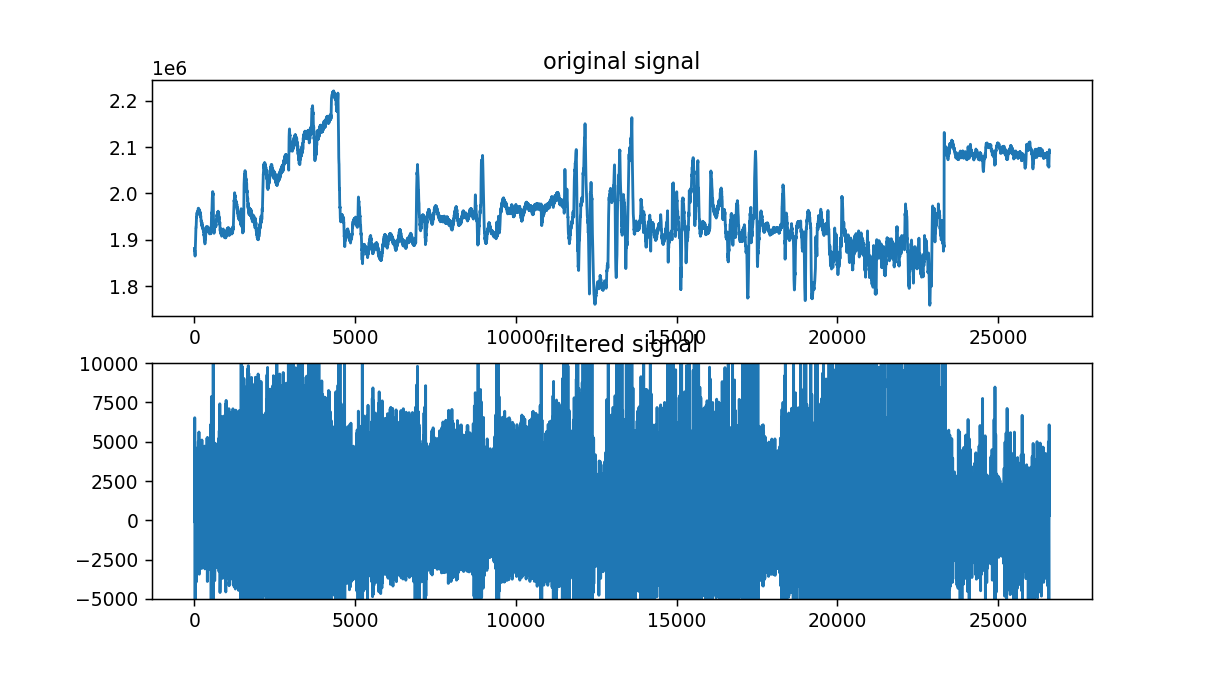

<IPython.core.display.Javascript object>


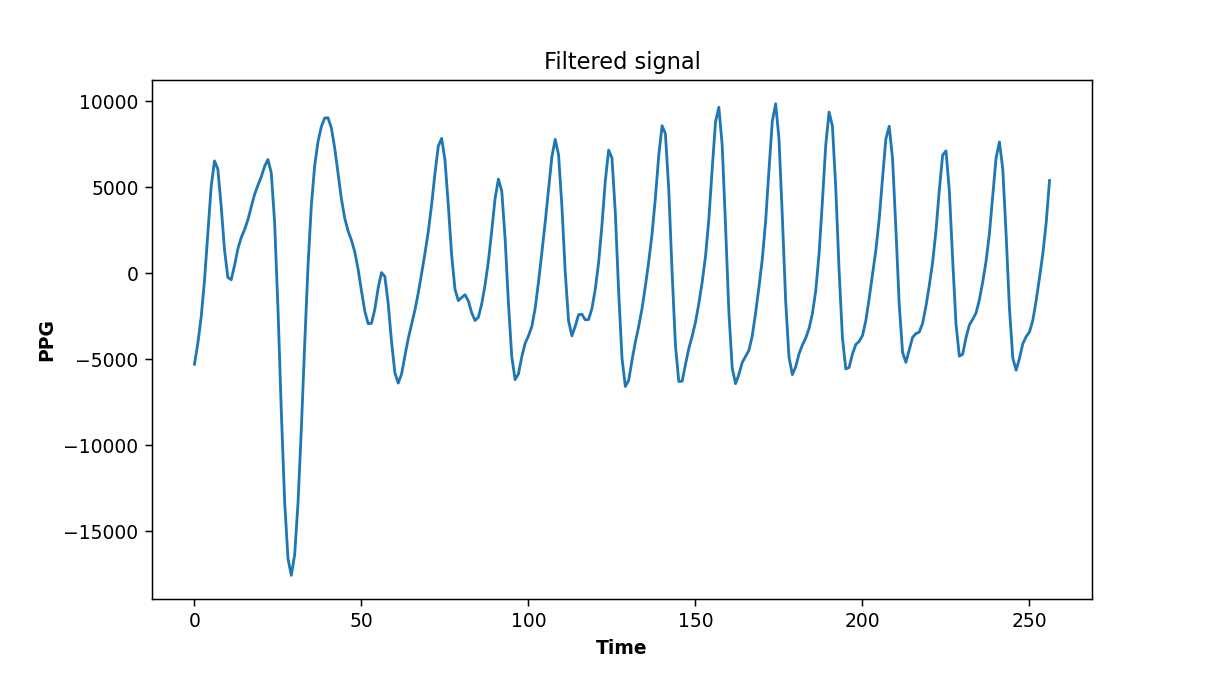

<IPython.core.display.Javascript object>


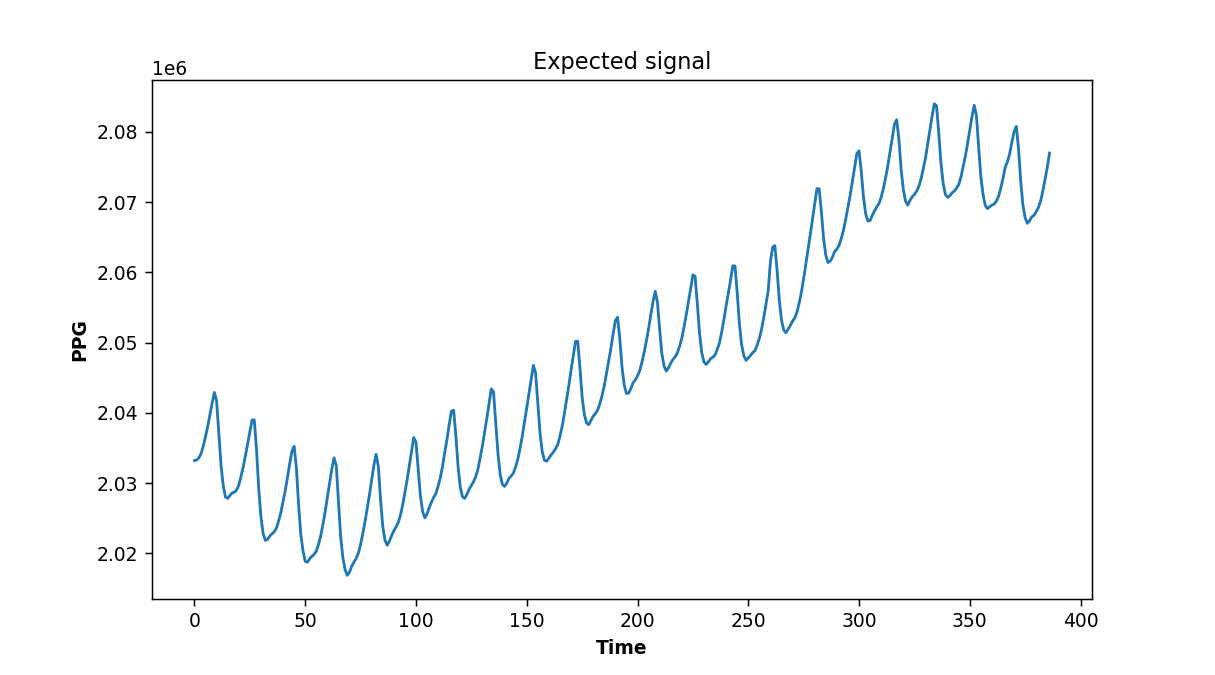

Text(0.5, 0, 'Time')

In [46]:
filtered1 = hp.filter_signal(signal1, [0.7, 5], sample_rate=sample_rate, 
                            order=6, filtertype='bandpass')

#let's plot first 240 seconds and work with that!
plt.figure(figsize=(9,5))
plt.subplot(211)
plt.plot(signal1)
plt.title('original signal')
plt.subplot(212)
plt.plot(filtered1)
plt.title('filtered signal')
plt.ylim(-5000, 10000)
plt.show()

plt.figure(figsize=(9,5))
#plt.subplot(212)
plt.plot(filtered1[1500:int(sample_rate * 70)])
plt.title('Filtered signal')
plt.ylabel('PPG',fontweight='bold')
plt.xlabel('Time',fontweight='bold')
#plt.subplot(211)
plt.figure(figsize=(9,5))
plt.plot(signal1[2500:int(115 * sample_rate)])
plt.title('Expected signal')
plt.ylabel('PPG',fontweight='bold')
plt.xlabel('Time',fontweight='bold')

In [35]:
from scipy.signal import resample

resampled = resample(filtered, len(filtered) * 4)

#don't forget to compute the new sampling rate
new_sample_rate = sample_rate * 4

In [36]:
from scipy.signal import resample

resampled1 = resample(filtered1, len(filtered) * 4)

#don't forget to compute the new sampling rate
new_sample_rate = sample_rate * 4

<IPython.core.display.Javascript object>


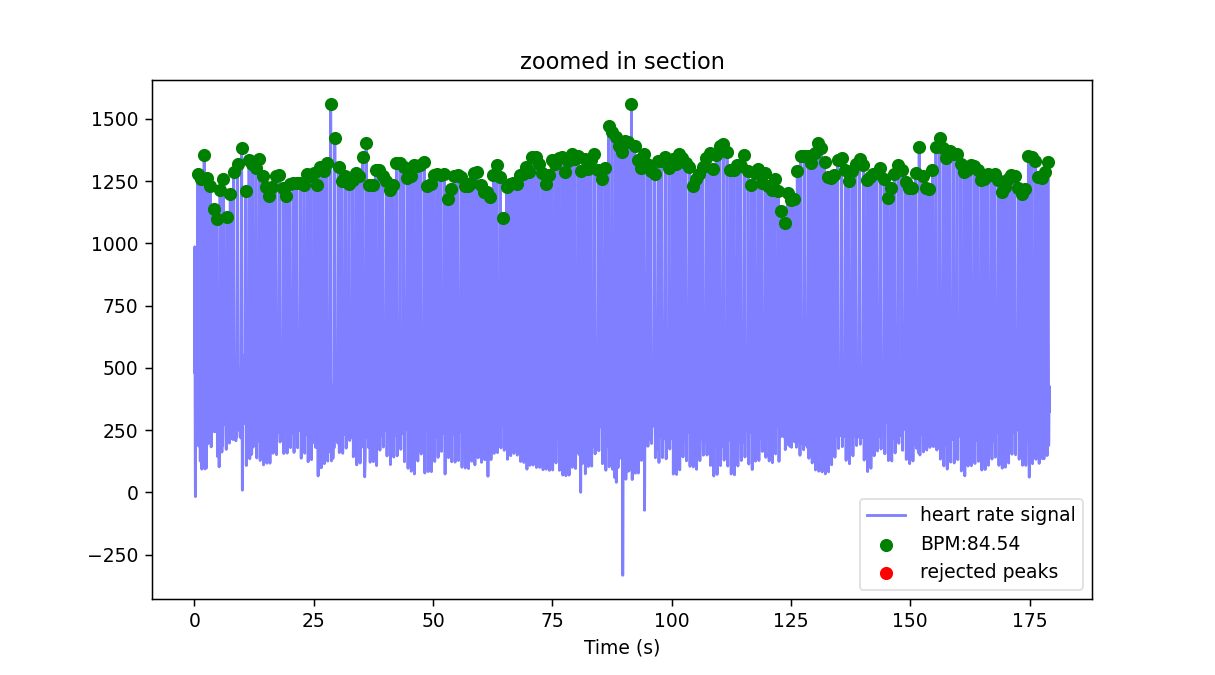

<IPython.core.display.Javascript object>


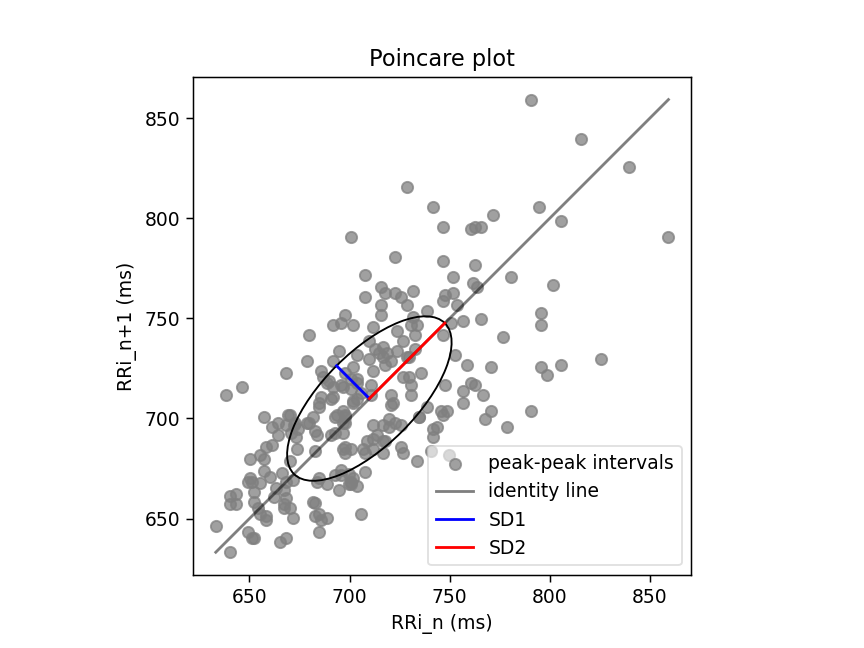

bpm: 84.538621
ibi: 709.734784
sdnn: 41.098965
sdsd: 19.441645
rmssd: 32.757386
pnn20: 0.540000
pnn50: 0.116000
hr_mad: 26.867961
sd1: 23.162937
sd2: 53.252380
s: 3875.096381
sd1/sd2: 0.434965
breathingrate: 0.266667


<IPython.core.display.Javascript object>


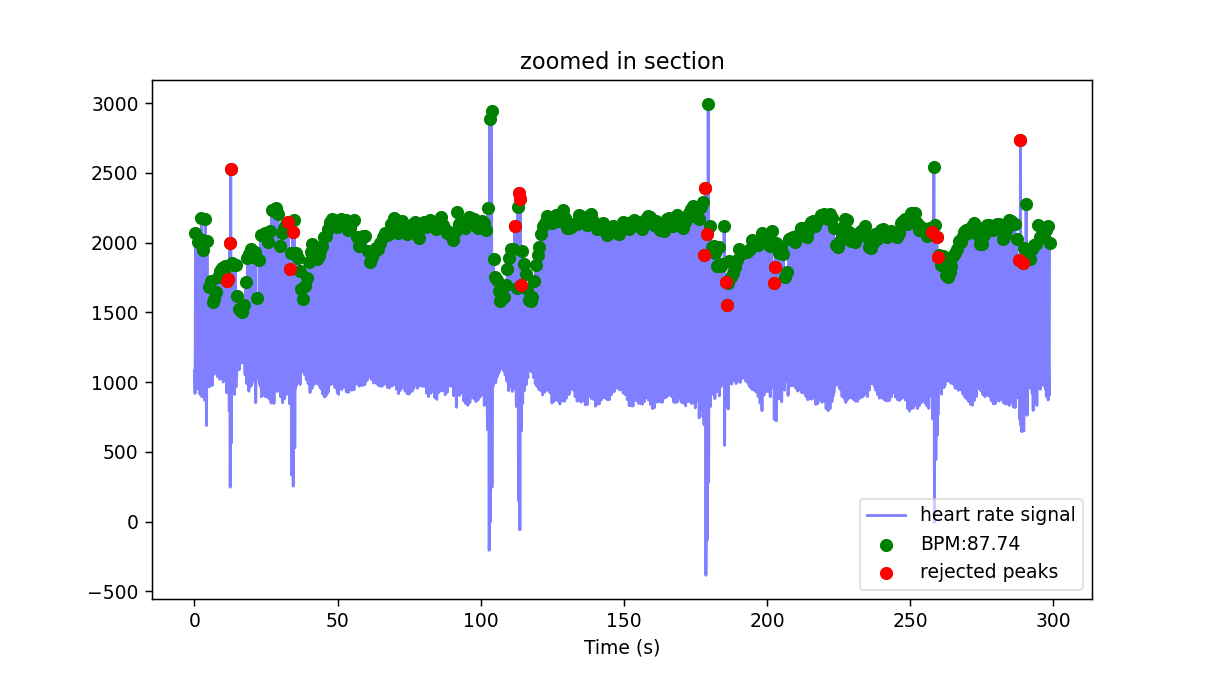

<IPython.core.display.Javascript object>


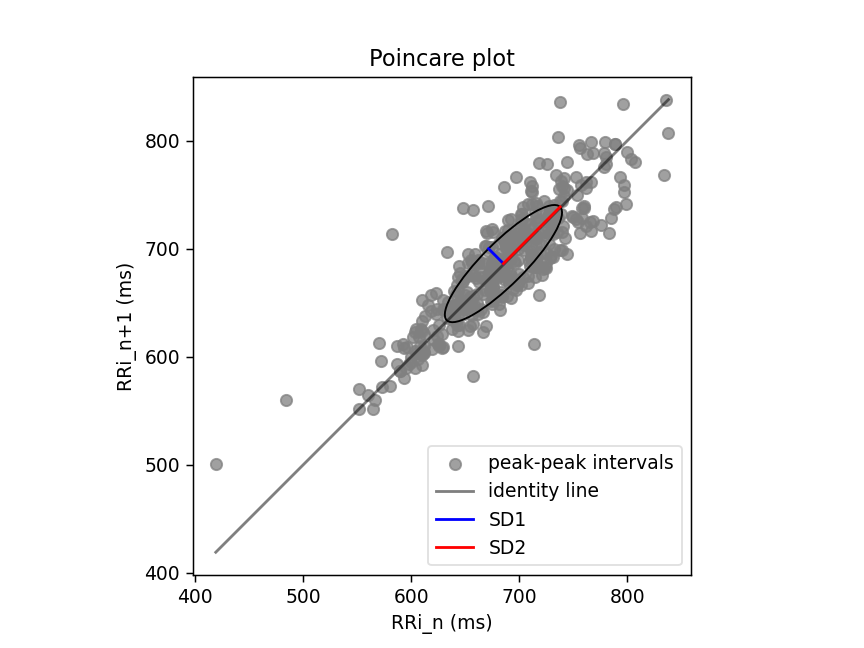

bpm: 87.738138
ibi: 683.853124
sdnn: 56.379139
sdsd: 17.960627
rmssd: 27.624564
pnn20: 0.421569
pnn50: 0.058824
hr_mad: 35.345954
sd1: 19.522686
sd2: 74.212521
s: 4551.626513
sd1/sd2: 0.263065
breathingrate: 0.133333


<IPython.core.display.Javascript object>


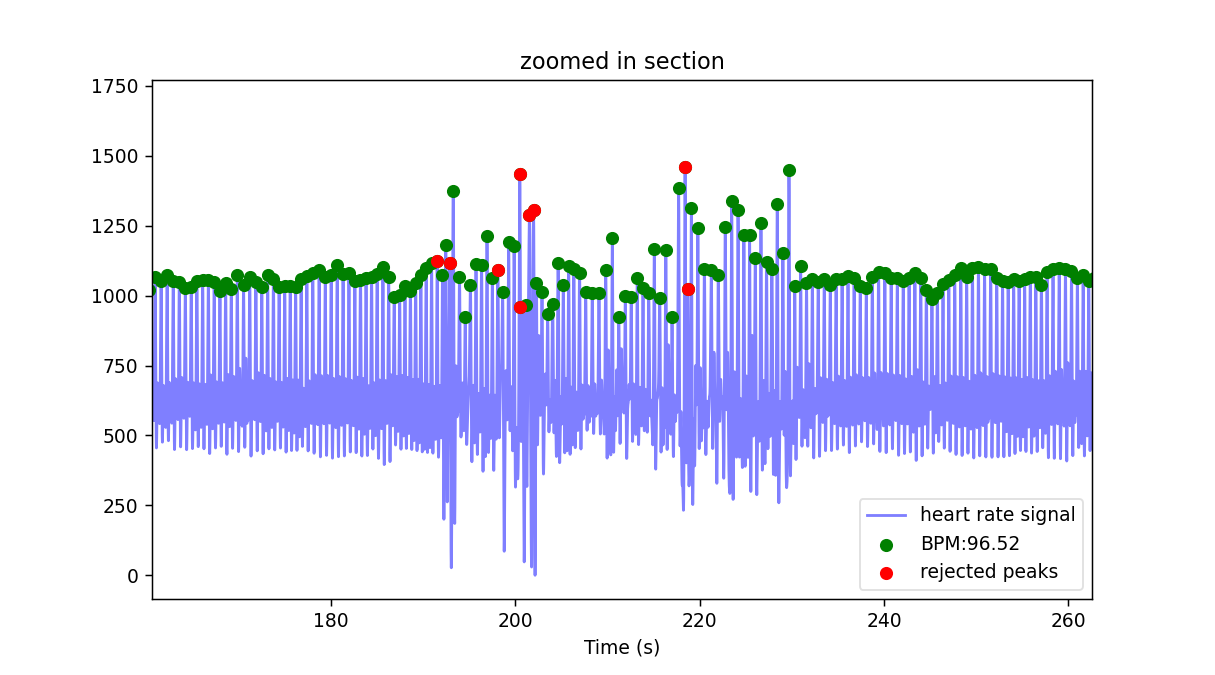

<IPython.core.display.Javascript object>


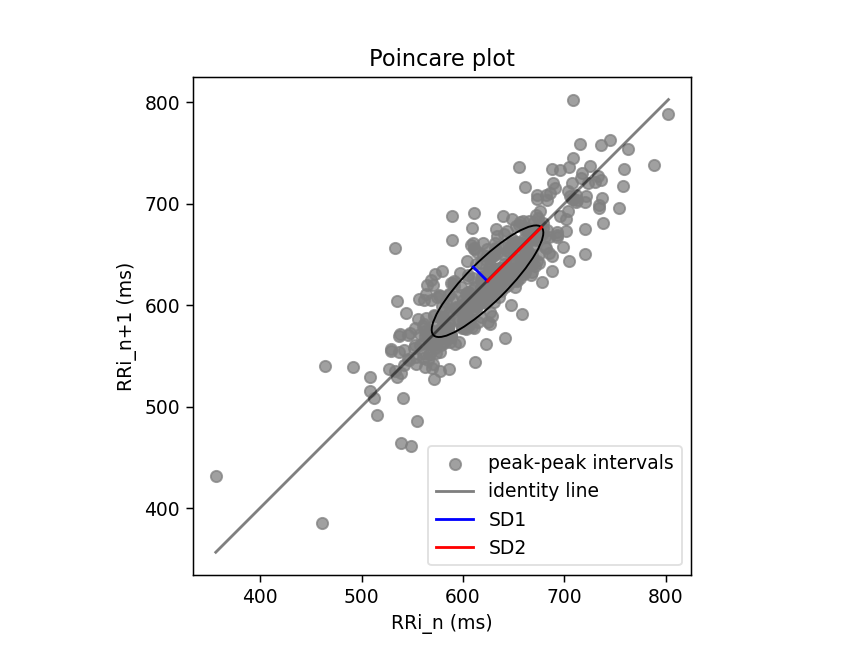

bpm: 96.516672
ibi: 621.654259
sdnn: 59.464962
sdsd: 18.520715
rmssd: 28.059014
pnn20: 0.392344
pnn50: 0.076555
hr_mad: 35.867961
sd1: 19.834200
sd2: 75.214161
s: 4686.667884
sd1/sd2: 0.263703
breathingrate: 0.100000


<IPython.core.display.Javascript object>


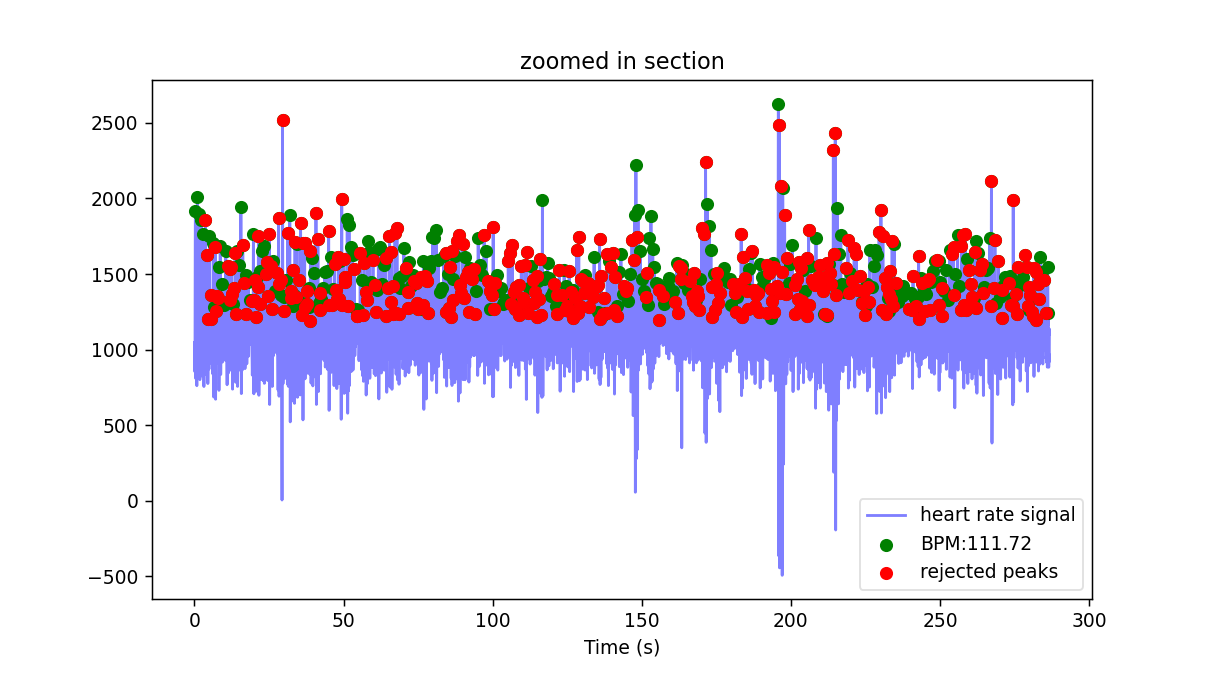

<IPython.core.display.Javascript object>


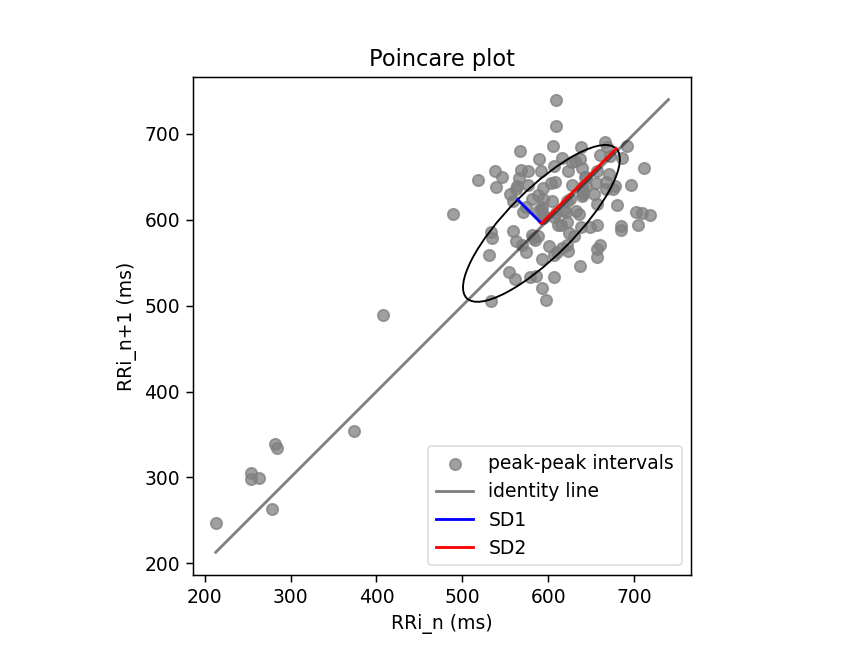

bpm: 111.720107
ibi: 537.056415
sdnn: 144.745241
sdsd: 33.240693
rmssd: 55.402428
pnn20: 0.705426
pnn50: 0.364341
hr_mad: 49.757928
sd1: 39.086602
sd2: 122.993538
s: 15102.890727
sd1/sd2: 0.317794
breathingrate: 0.200000


In [37]:
#run HeartPy over a few segments, fingers crossed, and plot results of each
for s in [[0, 18000], [18000, 48000], [48000, 78000], [78000, 108000]]:
    wd, m = hp.process(resampled[s[0]:s[1]], sample_rate = new_sample_rate, 
                       high_precision=True, clean_rr=True)
    hp.plotter(wd, m, title = 'zoomed in section', figsize=(9,5))
    hp.plot_poincare(wd, m)
    plt.show()
    for measure in m.keys():
        print('%s: %f' %(measure, m[measure]))

<IPython.core.display.Javascript object>


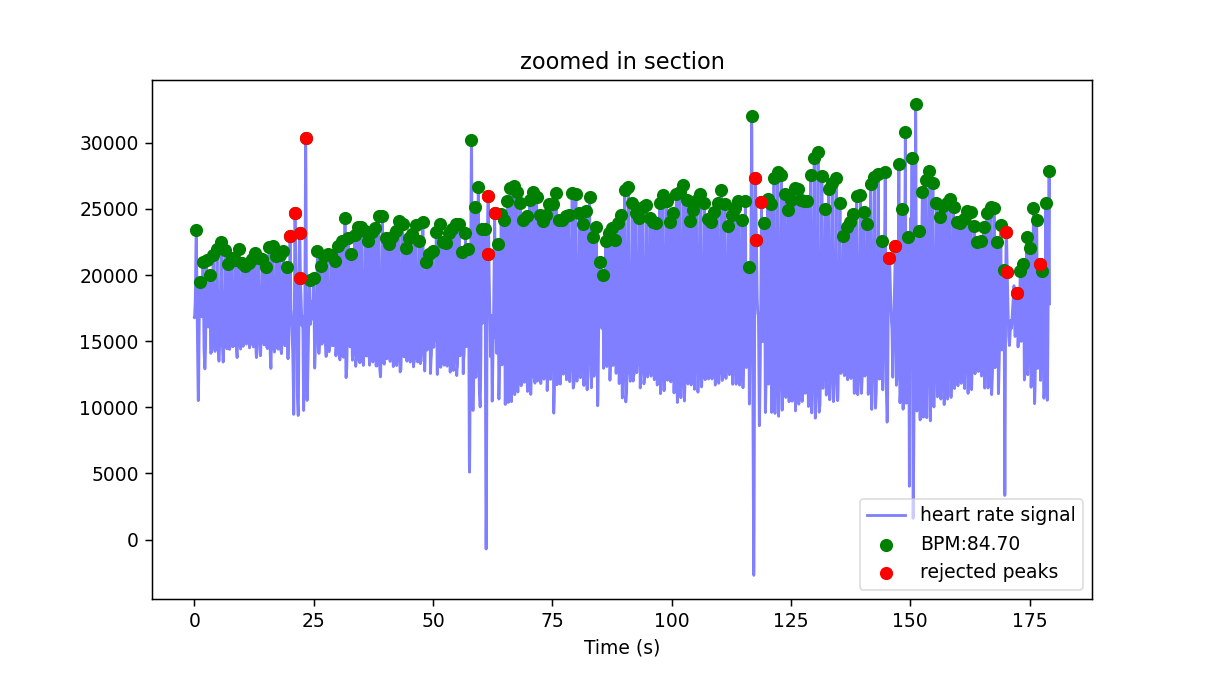

<IPython.core.display.Javascript object>


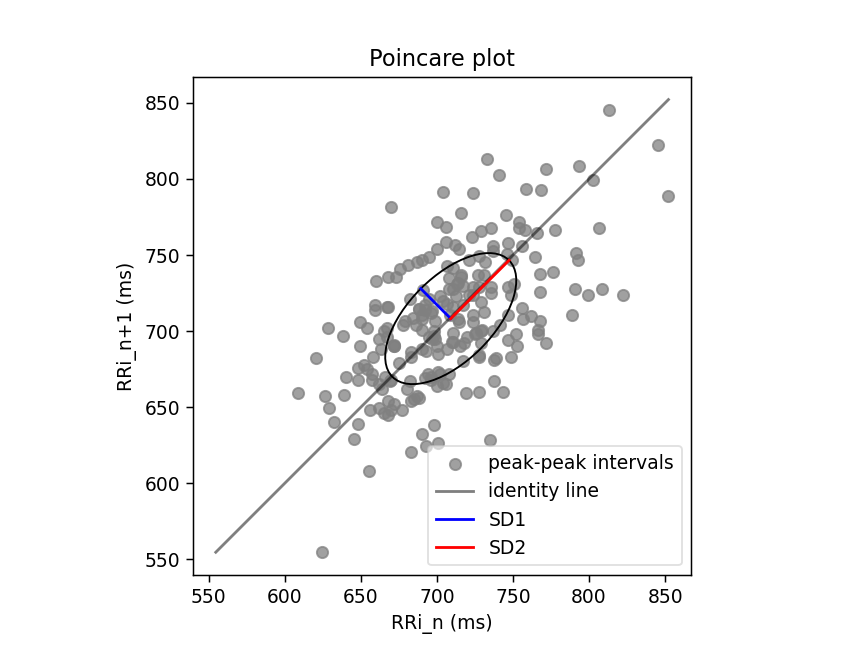

bpm: 84.696452
ibi: 708.412205
sdnn: 44.031979
sdsd: 23.153627
rmssd: 39.396736
pnn20: 0.610619
pnn50: 0.234513
hr_mad: 28.867961
sd1: 27.850905
sd2: 54.198718
s: 4742.181748
sd1/sd2: 0.513866
breathingrate: 0.266667


<IPython.core.display.Javascript object>


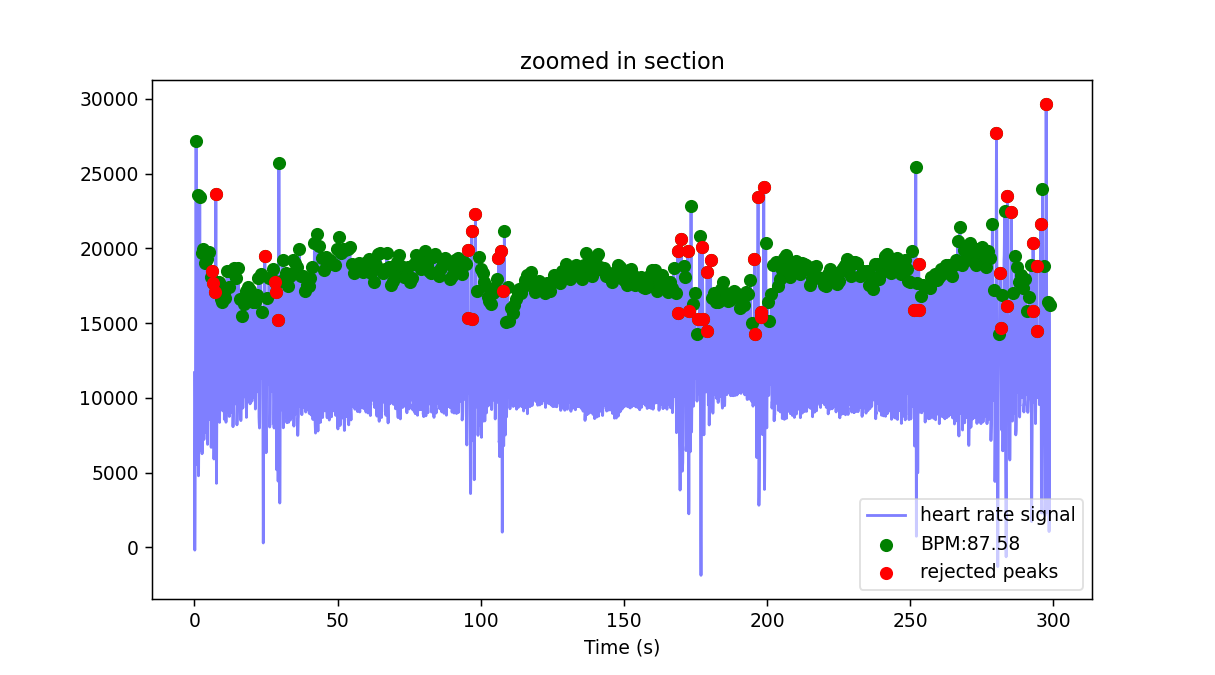

<IPython.core.display.Javascript object>


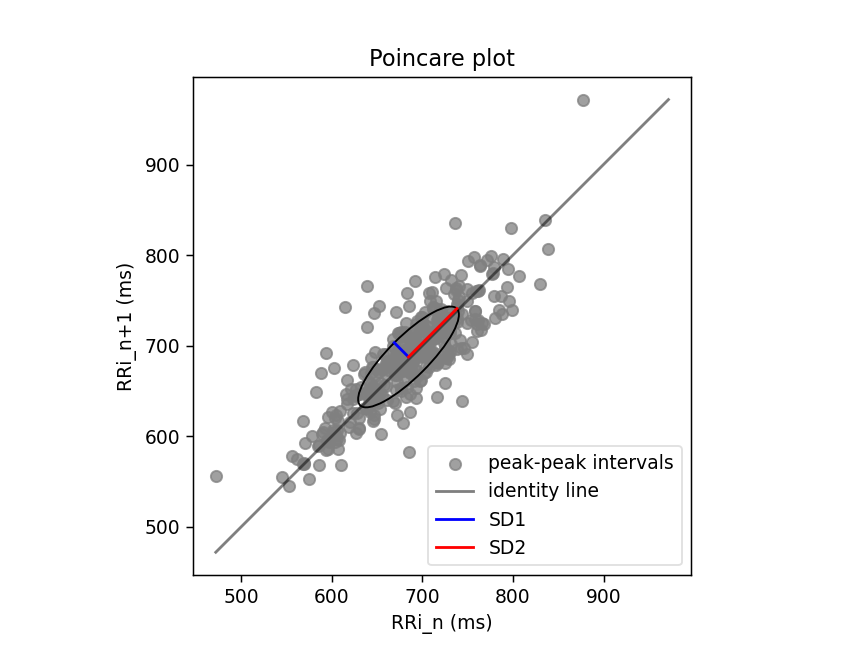

bpm: 87.578435
ibi: 685.100164
sdnn: 58.722192
sdsd: 21.191678
rmssd: 31.557760
pnn20: 0.451872
pnn50: 0.085561
hr_mad: 36.845954
sd1: 22.226903
sd2: 75.482307
s: 5270.769037
sd1/sd2: 0.294465
breathingrate: 0.133333


<IPython.core.display.Javascript object>


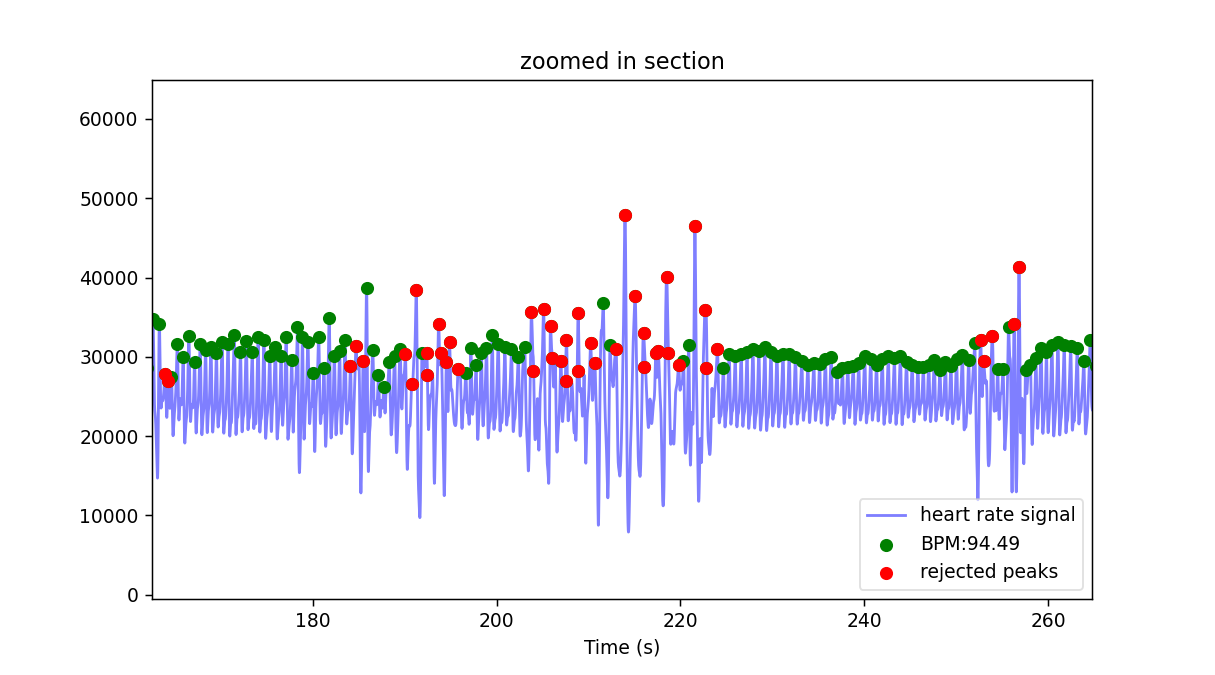

C:\Users\prana\anaconda3\lib\site-packages\heartpy\visualizeutils.py:260: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize=figsize)


<IPython.core.display.Javascript object>


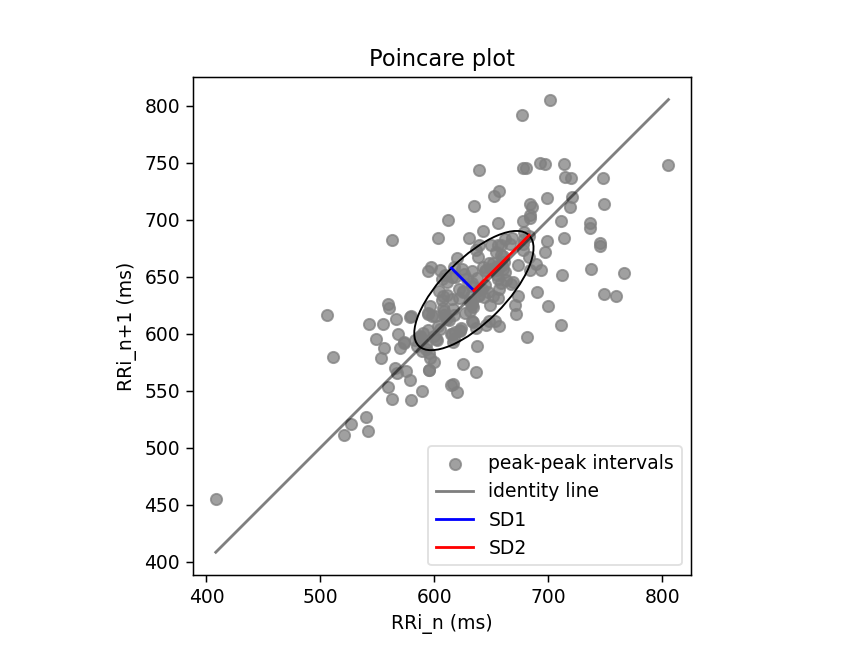

bpm: 94.494726
ibi: 634.956073
sdnn: 66.029557
sdsd: 26.756268
rmssd: 39.538482
pnn20: 0.497717
pnn50: 0.191781
hr_mad: 35.823948
sd1: 27.870494
sd2: 68.561049
s: 6003.050470
sd1/sd2: 0.406506
breathingrate: 0.133333


<IPython.core.display.Javascript object>


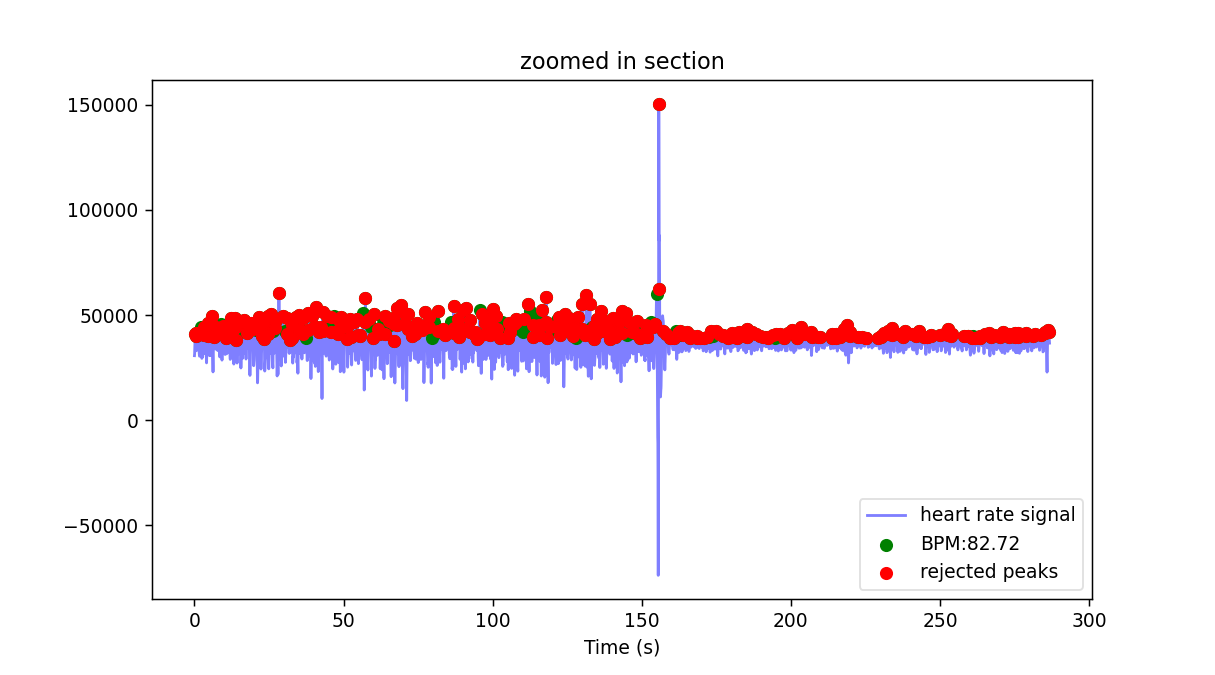

<IPython.core.display.Javascript object>


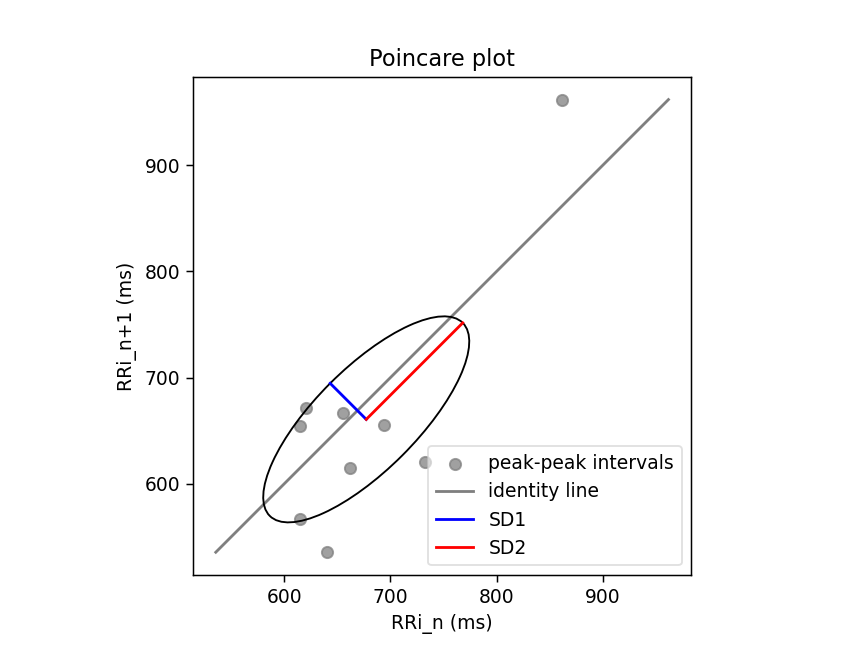

bpm: 82.723474
ibi: 725.308031
sdnn: 146.299316
sdsd: 33.194189
rmssd: 69.863995
pnn20: 0.888889
pnn50: 0.444444
hr_mad: 78.691909
sd1: 47.995304
sd2: 128.461054
s: 19369.575501
sd1/sd2: 0.373618
breathingrate: 0.300000


In [38]:
#run HeartPy over a few segments, fingers crossed, and plot results of each
for s in [[0, 18000], [18000, 48000], [48000, 78000], [78000, 108000]]:
    wd, m = hp.process(resampled1[s[0]:s[1]], sample_rate = new_sample_rate, 
                       high_precision=True, clean_rr=True)
    hp.plotter(wd, m, title = 'zoomed in section', figsize=(9,5))
    hp.plot_poincare(wd, m)
    plt.show()
    for measure in m.keys():
        print('%s: %f' %(measure, m[measure]))